<a href="https://colab.research.google.com/github/cmontg26/Data110/blob/main/Candace_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Load all sheets
excel_path = "/content/Future of Jobs and AI.xlsx"

jobs_df          = pd.read_excel(excel_path, sheet_name="Future of Jobs and AI")
series_df        = pd.read_excel(excel_path, sheet_name="Top Skills by Series")
edu_df           = pd.read_excel(excel_path, sheet_name="Top Skill by Education")
fastest_df       = pd.read_excel(excel_path, sheet_name="Top Fastest Growing")
percent_skill_df = pd.read_excel(excel_path, sheet_name="Percentage by Position Skill")

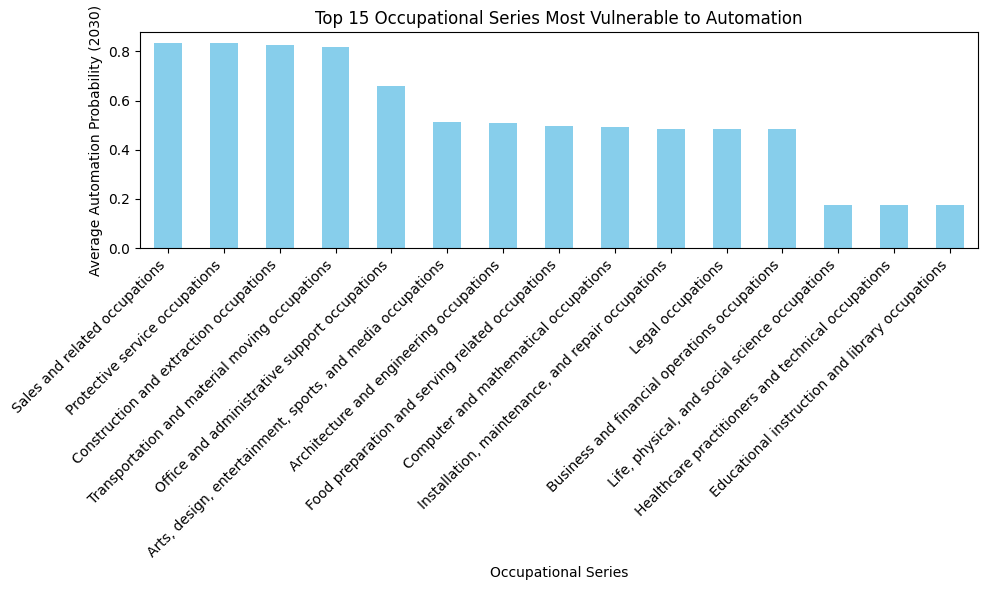

In [ ]:
import matplotlib.pyplot as plt

# Aggregate automation probability by occupational series (corrected column name)
series_risk = (
    jobs_df.groupby("Occupational_Series")["Automation_Probability_2030"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10,6))
series_risk.plot(kind="bar", color="skyblue")
plt.title("Top 15 Occupational Series Most Vulnerable to Automation")
plt.ylabel("Average Automation Probability (2030)")
plt.xlabel("Occupational Series")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


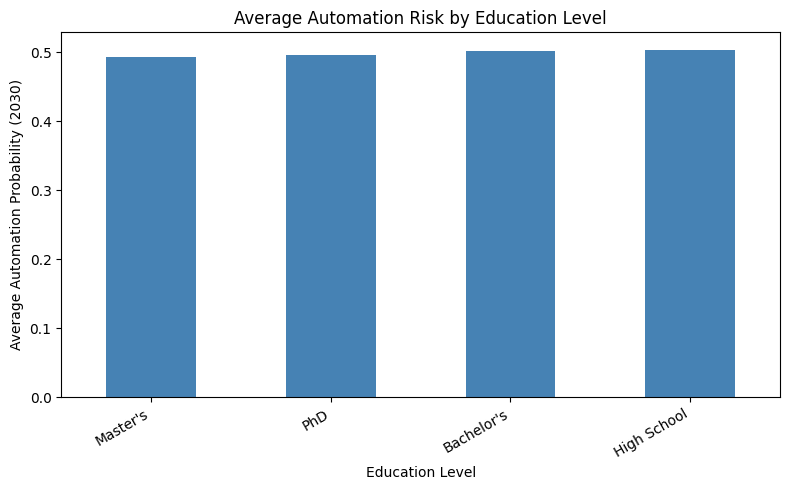

Average automation risk by education level:
Education_Level
Master's       0.493225
PhD            0.496384
Bachelor's     0.501467
High School    0.503867
Name: Automation_Probability_2030, dtype: float64


In [ ]:
# Compute mean automation probability per education level
edu_risk = (
    jobs_df.groupby("Education_Level")["Automation_Probability_2030"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(8,5))
edu_risk.plot(kind="bar", color="steelblue")
plt.title("Average Automation Risk by Education Level")
plt.ylabel("Average Automation Probability (2030)")
plt.xlabel("Education Level")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

print("Average automation risk by education level:")
print(edu_risk)


/tmp/ipython-input-3603083379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


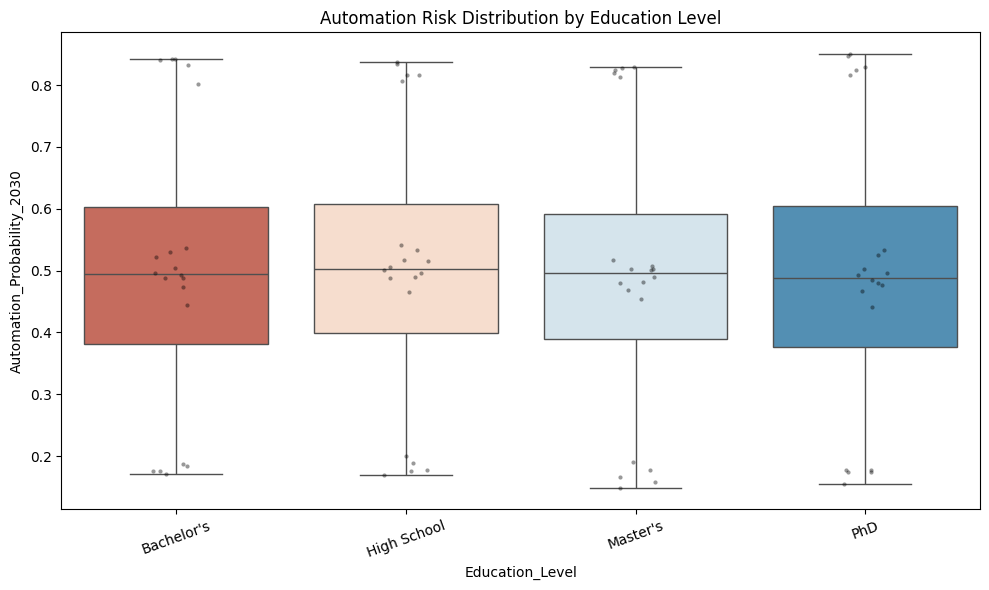

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=jobs_df,
    x="Education_Level",
    y="Automation_Probability_2030",
    palette="RdBu"
)
sns.stripplot(
    data=jobs_df,
    x="Education_Level",
    y="Automation_Probability_2030",
    color="black",
    size=3,
    alpha=0.4
)

plt.title("Automation Risk Distribution by Education Level")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


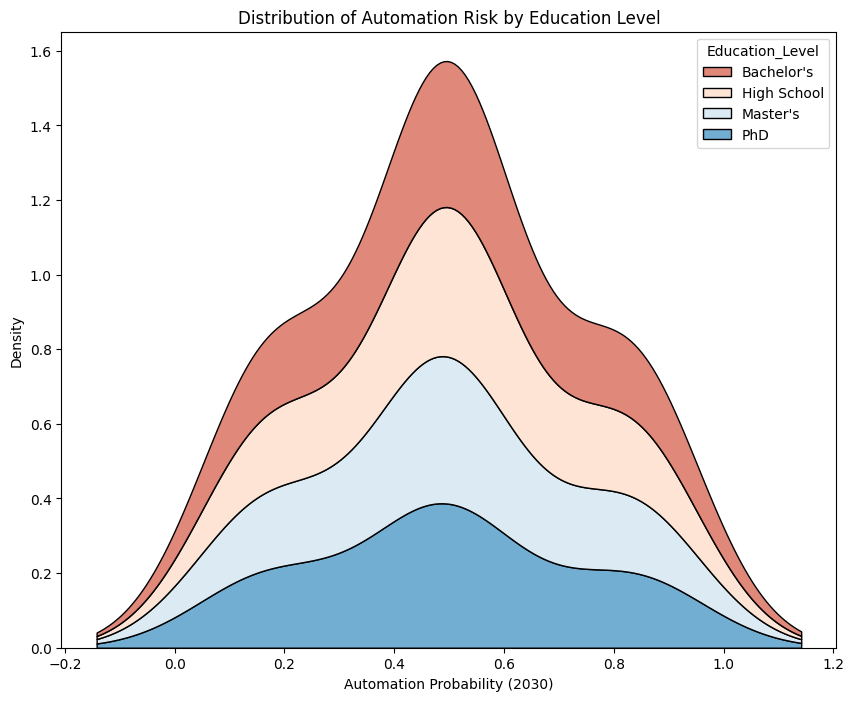

In [ ]:
plt.figure(figsize=(10,8))

sns.kdeplot(
    data=jobs_df,
    x="Automation_Probability_2030",
    hue="Education_Level",
    multiple="stack",
    fill=True,
    palette="RdBu"
)

plt.title("Distribution of Automation Risk by Education Level")
plt.xlabel("Automation Probability (2030)")
plt.show()


In [ ]:
fig = px.scatter(
    jobs_df,
    x="Average_Salary",
    y="Automation_Probability_2030",
    color="Education_Level",
    hover_name="Job_Title",
    title="Automation Risk vs Salary, Colored by Education Level"
)
fig.show()

In [ ]:
fig = px.box(
    jobs_df,
    x="Occupational_Series",
    y="Automation_Probability_2030",
    color="Education_Level",
    title="Automation Risk Across Occupational Series by Education Level")

fig.update_layout(
    width=1200,
    height=700,
    xaxis_tickangle=45,
    legend_title="Education Level",
    title_x=0.5)

fig.show()

In [ ]:
# Aggregate numeric columns by occupational series
agg_cols = ["AI_Exposure_Index", "Automation_Probability_2030", "Tech_Growth_Factor"]
series_agg = jobs_df.groupby("Occupational_Series")[agg_cols].mean().reset_index()

fig = px.scatter(
    series_agg,
    x="AI_Exposure_Index",
    y="Automation_Probability_2030",
    hover_name="Occupational_Series",
    size="Tech_Growth_Factor",
    color="Automation_Probability_2030",
    title="AI Exposure vs Automation Risk (Aggregated by Occupational Series)",
    labels={
        "AI_Exposure_Index": "AI Exposure Index",
        "Automation_Probability_2030": "Automation Risk (2030)"
    }
)
fig.show()


In [ ]:
import pandas as pd

excel_path = "/content/Future of Jobs and AI.xlsx"

jobs_df          = pd.read_excel(excel_path, sheet_name="Future of Jobs and AI")
percent_skill_df = pd.read_excel(excel_path, sheet_name="Percentage by Position Skill")

print("jobs_df columns:", jobs_df.columns.tolist())
print("percent_skill_df columns:", percent_skill_df.columns.tolist())

print("\nSample jobs_df:\n", jobs_df.head())
print("\nSample percent_skill_df:\n", percent_skill_df.head())


jobs_df columns: ['Occupational_Series', 'Job_Title', '2024_NEM_Code', 'Average_Salary', 'Years_Experience', 'Education_Level', 'AI_Exposure_Index', 'Tech_Growth_Factor', 'Automation_Probability_2030', 'Skill_1', 'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7', 'Skill_8', 'Skill_9', 'Skill_10']
percent_skill_df columns: ['Job_Title', '2024_NEM_Code', 'Adaptability', 'Computers and information technology', 'Creativity and innovation', 'Critical and analytical thinking', 'Customer service', 'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership', 'Mathematics', 'Mechanical', 'Physical strength and stamina', 'Problem solving and decision making', 'Project management', 'Science', 'Speaking and listening', 'Writing and reading']

Sample jobs_df:
                                 Occupational_Series    Job_Title  \
0          Architecture and engineering occupations  AI Engineer   
1          Architecture and engineering occupations  AI Engineer   
2          Architect

In [ ]:
print(jobs_df.columns)
print(percent_skill_df.columns)

Index(['Occupational_Series', 'Job_Title', '2024_NEM_Code', 'Average_Salary',
       'Years_Experience', 'Education_Level', 'AI_Exposure_Index',
       'Tech_Growth_Factor', 'Automation_Probability_2030', 'Skill_1',
       'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7',
       'Skill_8', 'Skill_9', 'Skill_10'],
      dtype='object')
Index(['Job_Title', '2024_NEM_Code', 'Adaptability',
       'Computers and information technology', 'Creativity and innovation',
       'Critical and analytical thinking', 'Customer service',
       'Detail oriented', 'Fine motor', 'Interpersonal', 'Leadership',
       'Mathematics', 'Mechanical', 'Physical strength and stamina',
       'Problem solving and decision making', 'Project management', 'Science',
       'Speaking and listening', 'Writing and reading'],
      dtype='object')


In [ ]:
print(jobs_df.dtypes, "\n")
print(percent_skill_df.dtypes)


Occupational_Series             object
Job_Title                       object
2024_NEM_Code                   object
Average_Salary                 float64
Years_Experience               float64
Education_Level                 object
AI_Exposure_Index              float64
Tech_Growth_Factor             float64
Automation_Probability_2030    float64
Skill_1                        float64
Skill_2                        float64
Skill_3                        float64
Skill_4                        float64
Skill_5                        float64
Skill_6                        float64
Skill_7                        float64
Skill_8                        float64
Skill_9                        float64
Skill_10                       float64
dtype: object 

Job_Title                                object
2024_NEM_Code                            object
Adaptability                            float64
Computers and information technology    float64
Creativity and innovation               float64
Cri

In [ ]:
merged = pd.merge(
    jobs_df,
    percent_skill_df,
    on="2024_NEM_Code",
    how="inner"
)
print("merged shape:", merged.shape)
print(merged.head())

merged shape: (0, 37)
Empty DataFrame
Columns: [Occupational_Series, Job_Title_x, 2024_NEM_Code, Average_Salary, Years_Experience, Education_Level, AI_Exposure_Index, Tech_Growth_Factor, Automation_Probability_2030, Skill_1, Skill_2, Skill_3, Skill_4, Skill_5, Skill_6, Skill_7, Skill_8, Skill_9, Skill_10, Job_Title_y, Adaptability, Computers and information technology, Creativity and innovation, Critical and analytical thinking, Customer service, Detail oriented, Fine motor, Interpersonal, Leadership, Mathematics, Mechanical, Physical strength and stamina, Problem solving and decision making, Project management, Science, Speaking and listening, Writing and reading]
Index: []

[0 rows x 37 columns]


In [ ]:
print("jobs unique titles (first 10):")
print(jobs_df["Occupational_Series"].unique()[:10])

print("\npercent_skill_df unique titles (first 10):")
print(percent_skill_df["Job_Title"].unique()[:10])


jobs unique titles (first 10):
[' Architecture and engineering occupations'
 'Food preparation and serving related occupations'
 'Construction and extraction occupations'
 'Office and administrative support occupations'
 'Computer and mathematical occupations'
 'Healthcare practitioners and technical occupations'
 'Business and financial operations occupations'
 'Arts, design, entertainment, sports, and media occupations'
 'Legal occupations' 'Installation, maintenance, and repair occupations']

percent_skill_df unique titles (first 10):
['Chief executives' 'General and operations managers' 'Legislators[1]'
 'Advertising and promotions managers' 'Marketing managers'
 'Sales managers' 'Public relations managers[1]' 'Fundraising managers[1]'
 'Administrative services managers' 'Facilities managers']


In [ ]:
percent_skill_df.head()

,Job_Title,2024_NEM_Code,Adaptability,Computers and information technology,Creativity and innovation,Critical and analytical thinking,Customer service,Detail oriented,Fine motor,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
0,Chief executives,11-1011,0.89,0.78,0.94,0.99,0.94,0.59,0.15,0.86,1.00,0.90,0.32,0.17,1.00,1.00,0.54,0.97,0.95
1,General and operations managers,11-1021,0.80,0.58,0.77,0.78,0.79,0.41,0.15,0.78,0.97,0.72,0.38,0.32,0.95,0.99,0.46,0.72,0.76
2,Legislators[1],11-1031,0.89,0.78,0.94,0.99,0.94,0.59,0.15,0.86,1.00,0.90,0.32,0.17,1.00,1.00,0.54,0.97,0.95
3,Advertising and promotions managers,11-2011,0.70,0.70,0.95,0.71,0.78,0.23,0.13,0.65,0.58,0.74,0.14,0.12,0.77,0.88,0.21,0.93,0.66
4,Marketing managers,11-2021,0.68,0.66,0.93,0.85,0.77,0.22,0.14,0.69,0.92,0.83,0.07,0.13,0.91,0.93,0.17,0.89,0.66


In [ ]:
import plotly.express as px

percent_skill_df = pd.read_excel(excel_path, sheet_name="Percentage by Position Skill")

skill_cols = [c for c in percent_skill_df.columns if c not in ["Job_Title", "2024_NEM_Code"]]

corr_df2 = percent_skill_df[skill_cols].corr()
corr_df2.head()


,Adaptability,Computers and information technology,Creativity and innovation,Critical and analytical thinking,Customer service,Detail oriented,Fine motor,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
Adaptability,1.000000,0.614649,0.595527,0.691405,0.531212,0.154109,-0.496492,0.736145,0.598360,0.285980,-0.444069,-0.479743,0.716508,0.507461,0.229084,0.808084,0.759654
Computers and information technology,0.614649,1.000000,0.497175,0.776207,0.183029,0.132971,-0.567470,0.273241,0.323062,0.525061,-0.408039,-0.710673,0.591332,0.473805,0.219896,0.659732,0.806217
Creativity and innovation,0.595527,0.497175,1.000000,0.648760,0.156115,-0.130993,-0.433549,0.357312,0.510371,0.273538,-0.310602,-0.419620,0.515788,0.596248,0.241321,0.623085,0.599387
Critical and analytical thinking,0.691405,0.776207,0.648760,1.000000,0.122876,0.197311,-0.490972,0.289951,0.540721,0.636086,-0.314327,-0.597452,0.827056,0.597035,0.434315,0.702715,0.871864
Customer service,0.531212,0.183029,0.156115,0.122876,1.000000,0.042219,-0.273885,0.764250,0.314288,-0.011091,-0.318997,-0.129387,0.361280,0.307980,-0.101539,0.512631,0.256201


In [ ]:
percent_skill_df = pd.read_excel(excel_path, sheet_name="Percentage by Position Skill")

skill_cols = [c for c in percent_skill_df.columns if c not in ["Job_Title", "2024_NEM_Code"]]

corr_df2 = percent_skill_df[skill_cols].corr()
corr_df2.head()


,Adaptability,Computers and information technology,Creativity and innovation,Critical and analytical thinking,Customer service,Detail oriented,Fine motor,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
Adaptability,1.000000,0.614649,0.595527,0.691405,0.531212,0.154109,-0.496492,0.736145,0.598360,0.285980,-0.444069,-0.479743,0.716508,0.507461,0.229084,0.808084,0.759654
Computers and information technology,0.614649,1.000000,0.497175,0.776207,0.183029,0.132971,-0.567470,0.273241,0.323062,0.525061,-0.408039,-0.710673,0.591332,0.473805,0.219896,0.659732,0.806217
Creativity and innovation,0.595527,0.497175,1.000000,0.648760,0.156115,-0.130993,-0.433549,0.357312,0.510371,0.273538,-0.310602,-0.419620,0.515788,0.596248,0.241321,0.623085,0.599387
Critical and analytical thinking,0.691405,0.776207,0.648760,1.000000,0.122876,0.197311,-0.490972,0.289951,0.540721,0.636086,-0.314327,-0.597452,0.827056,0.597035,0.434315,0.702715,0.871864
Customer service,0.531212,0.183029,0.156115,0.122876,1.000000,0.042219,-0.273885,0.764250,0.314288,-0.011091,-0.318997,-0.129387,0.361280,0.307980,-0.101539,0.512631,0.256201


In [ ]:
fig = px.imshow(
    corr_df2,
    color_continuous_scale="RdBu_r",
    zmin=0, zmax=1,
    title="Skill Correlations Across Occupations (Percentage by Position Skill)"
)

fig.update_layout(width=1200, height=700)
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

percent_skill_df = pd.read_excel(excel_path, sheet_name="Percentage by Position Skill")

# Skill columns are everything except title + code
skill_cols = [
    c for c in percent_skill_df.columns
    if c not in ["Job_Title", "2024_NEM_Code"]
]

# Build correlation matrix across skills
corr_df = percent_skill_df[skill_cols].corr()

# Create interactive heatmap with graph_objects (avoids np.bool issue)
fig = go.Figure(
    data=go.Heatmap(
        z=corr_df.values,
        x=corr_df.columns,
        y=corr_df.index,
        colorscale="RdBu",
        zmin=-1,
        zmax=1,
        colorbar=dict(title="Correlation")
    )
)

fig.update_layout(
    title="Correlation Between Future Skills Across Occupations",
    xaxis_title="Skill",
    yaxis_title="Skill"
)

fig.show()


In [ ]:
fig = px.imshow(
    percent_skill_df.set_index("Job_Title")[skill_cols],
    color_continuous_scale="Blues"
)
fig.update_layout(width=1100,height=400)
fig.show()

In [ ]:
# Load the skill percentage sheet
percent_skill_df = pd.read_excel(excel_path, sheet_name="Percentage by Position Skill")

# Identify skill columns (everything EXCEPT Job_Title and 2024_NEM_Code)
skill_cols = [
    c for c in percent_skill_df.columns
    if c not in ["Job_Title", "2024_NEM_Code"]
]

# OPTIONAL: Select the top 30 occupations by overall skill level
percent_skill_df["Avg_Skill_Level"] = percent_skill_df[skill_cols].mean(axis=1)

top_positions = (
    percent_skill_df.sort_values("Avg_Skill_Level", ascending=False)
    .head(30)   # change this to show more or fewer occupations
)

# Heatmap data: skills as columns, occupations as rows
heat_data = top_positions[skill_cols]
occupations = top_positions["Job_Title"]

# Create interactive Plotly heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=heat_data.values,
        x=skill_cols,
        y=occupations,
        colorscale="RdBu",
        colorbar=dict(title="Skill Level")
    )
)

fig.update_layout(
    title="Visual 4B – Heatmap of Skills by Occupation (Top 30 Positions)",
    xaxis_title="Skill",
    yaxis_title="Occupation",
    width=1400,
    height=900,
    title_x=0.5
)

fig.show()



In [ ]:
import matplotlib.font_manager

# List common font directories
font_dirs = ['/usr/share/fonts', '/usr/local/share/fonts']
font_files = matplotlib.font_manager.findSystemFonts(fontpaths=font_dirs)

# You can print the font files to see what's available
print("Available fonts:")
for font_file in font_files:
    # Only print a subset of the path to keep it readable, and only .ttf files
    if '.ttf' in font_file.lower():
        print(font_file)

# You can also use font families known to matplotlib directly
# For example, 'DejaVu Sans', 'Liberation Sans', 'Arial'
print("\nCommon Matplotlib font families:")
print(matplotlib.font_manager.get_font_names())

Available fonts:
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf
/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf
/usr/share/fo

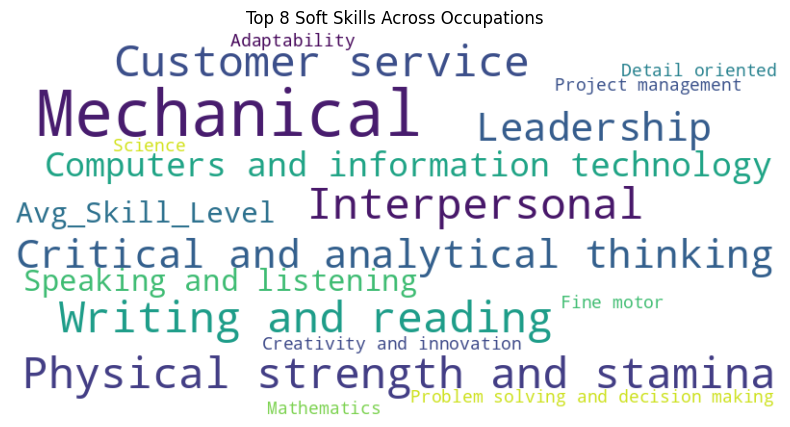

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for data manipulation

# The excel_path and percent_skill_df are already loaded in previous cells.
# Assuming 'percent_skill_df' is available from earlier execution (ujCpYhtWGTTT or KJryAxjjHdzq).
# If not, it would need to be loaded explicitly here.

# Identify skill columns (everything EXCEPT Job_Title and 2024_NEM_Code)
# This list is also available from previous executed cells (e.g., KJryAxjjHdzq)
skill_cols = [
    c for c in percent_skill_df.columns
    if c not in ["Job_Title", "2024_NEM_Code"]
]

# Melt the dataframe to get skills and their percentages in a long format
melted_skills = percent_skill_df.melt(
    id_vars=["Job_Title", "2024_NEM_Code"],
    value_vars=skill_cols,
    var_name="Skill_Name",
    value_name="Skill_Percentage"
)

# Aggregate the skill percentages to get an overall 'frequency' or importance for each skill
# Summing is a reasonable approach for a word cloud to represent overall presence/importance.
overall_skill_frequencies = melted_skills.groupby('Skill_Name')['Skill_Percentage'].sum().to_dict()

selected_colormap = 'viridis'

# Generate the word cloud with customizations
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap=selected_colormap # Specify the colormap
).generate_from_frequencies(overall_skill_frequencies)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 8 Soft Skills Across Occupations')
plt.show()

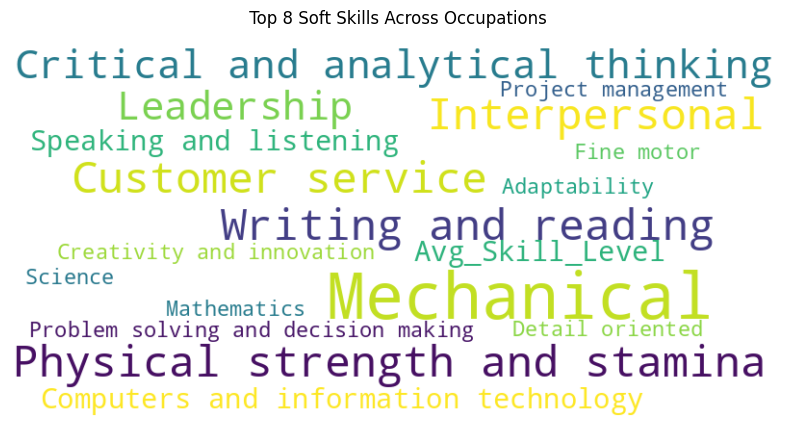

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Aggregate skill frequencies for the word cloud using the already defined overall_skill_frequencies
# overall_skill_frequencies = series_skill_presence.groupby('Skill_Name')['Skill_Count'].sum().to_dict()

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(overall_skill_frequencies)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' Top 8 Soft Skills Across Occupations')
plt.show()

In [ ]:
pip install wordcloud

In [ ]:
pip install cairosvg

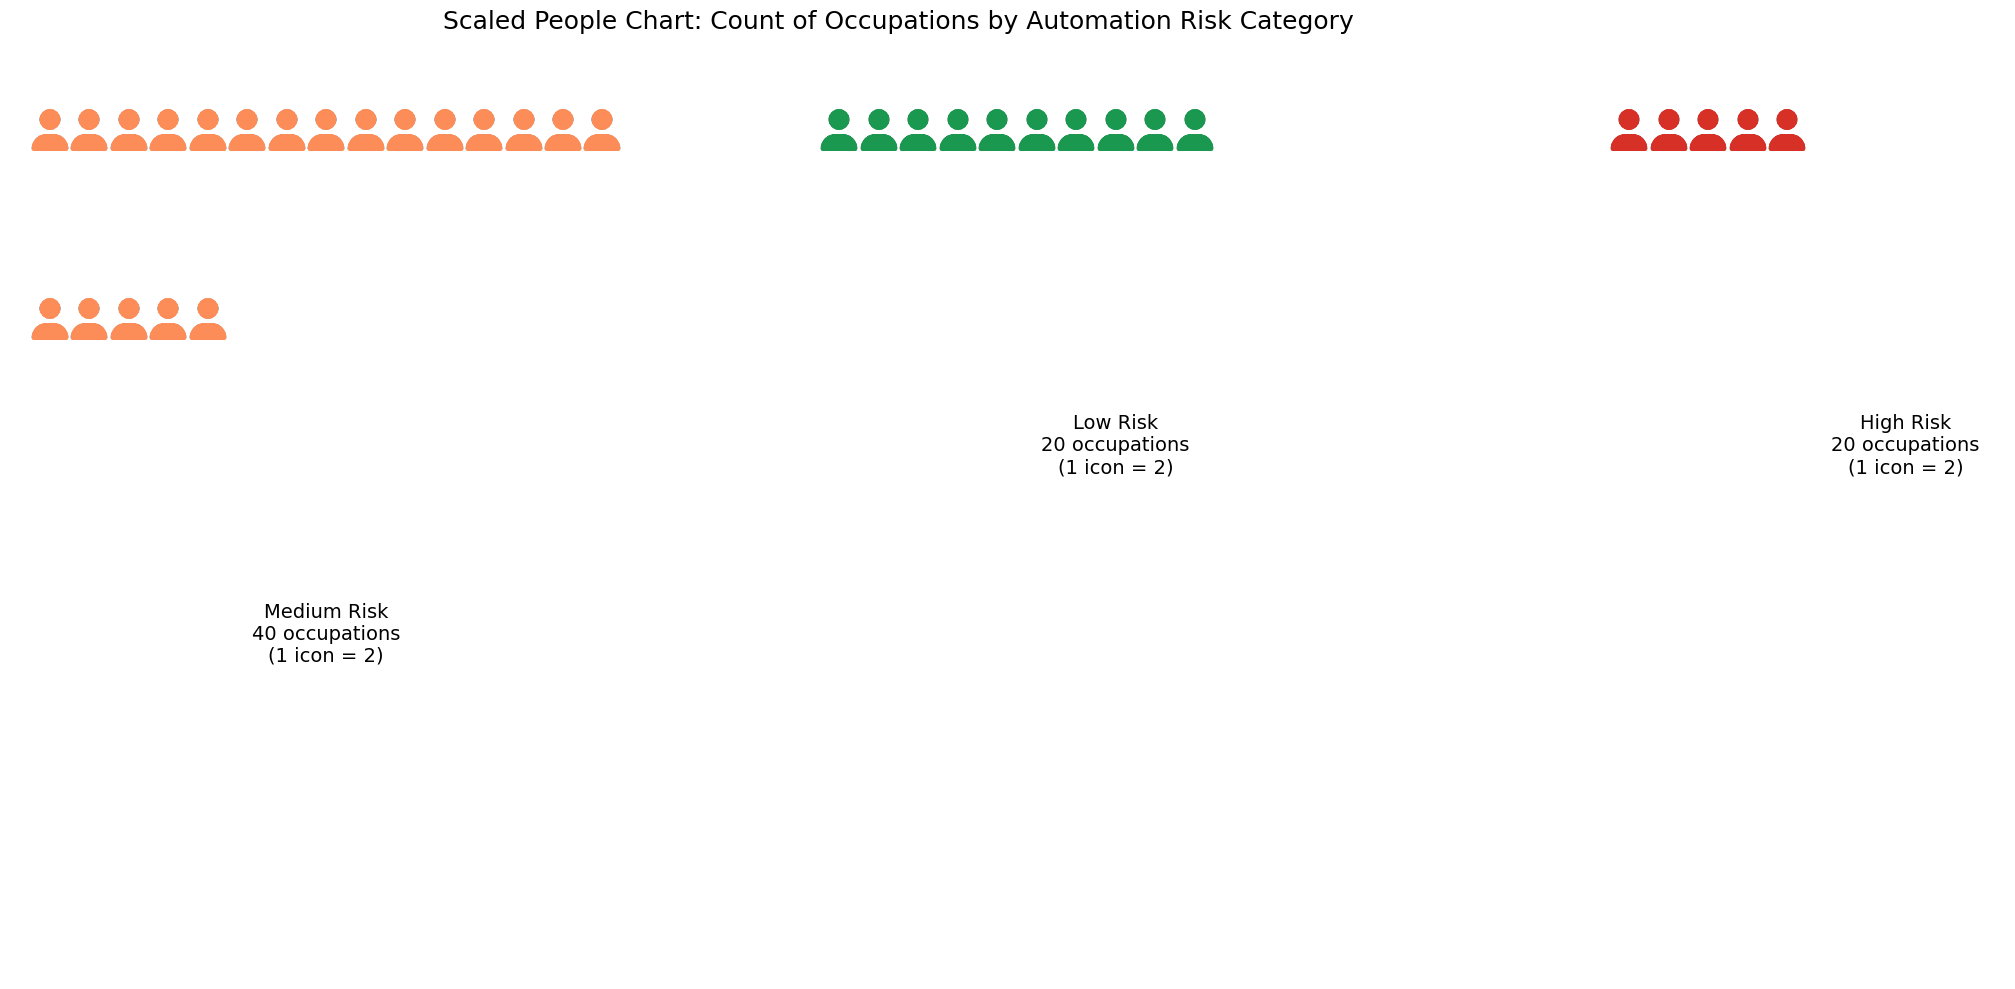

In [ ]:
import math
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import io
from PIL import Image, ImageDraw

# Need to bring person icon from Font Awesome 'user' solid icon)
svg_data = '<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 448 512"><!--! Font Awesome Free 6.7.2 by @fontawesome - https://fontawesome.com License - https://fontawesome.com/license/free (Icons: CC BY 4.0, Fonts: SIL OFL 1.1, Code: MIT License) Copyright 2024 Fonticons, Inc. --><path fill="#000000" d="M224 256A128 128 0 1 0 224 0a128 128 0 1 0 0 256zm-45.7 48C79.8 304 0 383.8 0 482.3C0 498.7 13.3 512 29.7 512l388.6 0c16.4 0 29.7-13.3 29.7-29.7C448 383.8 368.2 304 269.7 304l-91.4 0z"/></svg>'

def color_svg(svg_string, hex_color):

    return svg_string.replace('fill="#000000"', f'fill="{hex_color}"')

def classify_risk(p):
    if p >= 0.70:
        return "High Risk"
    elif p >= 0.40:
        return "Medium Risk"
    else:
        return "Low Risk"

# Count occupations by risk category
jobs_df["Risk_Category"] = jobs_df["Automation_Probability_2030"].apply(classify_risk)
risk_counts = jobs_df["Risk_Category"].value_counts()

# Scaling rule
SCALE = 2   # 1 icon = 2 occupations

# Colors
colors = {
    "High Risk": "#d73027",
    "Medium Risk": "#fc8d59",
    "Low Risk": "#1a9850"
}

fig, ax = plt.subplots(figsize=(20, 10)) # Increased figure width and height for better spacing

x_start = 0
icons_per_row = 15 # Increased icons per row for better layout

for risk, count in risk_counts.items():
    num_icons = math.ceil(count / SCALE)
    risk_color = colors.get(risk, "gray") # Get color for current risk category

    for i in range(num_icons):
        row = i // icons_per_row
        col = i % icons_per_row

        # Create a colored SVG string
        colored_svg = color_svg(svg_data, risk_color)

        try:
            from cairosvg import svg2png
            img_bytes = svg2png(bytestring=colored_svg.encode('utf-8'), output_width=100, output_height=100) # Increased output size
            img = Image.open(io.BytesIO(img_bytes)).convert("RGBA") # Ensure RGBA for transparency
        except ImportError:
            print("cairosvg not found, using a placeholder image for OffsetImage.")

            size = (100, 100) # Increased size for placeholder
            base_img = Image.new('RGBA', size, (255, 255, 255, 0)) # Start with a transparent image
            draw = ImageDraw.Draw(base_img)
            # Convert hex color to RGBA
            hex_color_rgb = tuple(int(risk_color[i:i+2], 16) for i in (1, 3, 5)) + (255,)
            # Draw a circle
            draw.ellipse((0, 0, size[0], size[1]), fill=hex_color_rgb)
            img = base_img

        im = OffsetImage(img, zoom=0.3) # Increased zoom for better visibility
        ab = AnnotationBbox(im, (x_start + col, -row),
                            xybox=(0, 0),
                            xycoords='data',
                            boxcoords='offset points',
                            pad=0.0,
                            frameon=False) # No frame around the icon
        ax.add_artist(ab)

    # Label under each group
    ax.text(
        x_start + (icons_per_row / 2) - 0.5, # Adjusted x position for label
        -row - 1.5, # Adjusted y position for label
        f"{risk}\n{count} occupations\n(1 icon = {SCALE})",
        ha="center",
        va="top",
        fontsize=14 # Increased font size for labels
    )

    x_start += icons_per_row + 5  # Increased spacing between groups

# Adjust y-limits to ensure all icons and labels are visible
y_max_icons = max( (math.ceil(c / SCALE) - 1) // icons_per_row for c in risk_counts.values) if not risk_counts.empty else 0
ax.set_ylim(-y_max_icons - 3.5, 0.5) # Dynamic y-limit based on number of rows of icons
ax.set_xlim(-1, x_start - icons_per_row - 1) # Adjust x-limits to fit all groups

ax.set_title(
    "Scaled People Chart: Count of Occupations by Automation Risk Category",
    fontsize=18 # Increased title font size
)

ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
!pip -q install openpyxl plotly statsmodels wordcloud joypy

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.io as pio

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import joypy  # ridge/joyplot

excel_path = "/content/FutureJobsandAutomation.xlsx"

USE_TRANSPARENT = True
ACCENT = "#7FDBFF"  # one consistent accent color for non-heatmap charts
paper_bg = "rgba(0,0,0,0)" if USE_TRANSPARENT else "white"
plot_bg  = "rgba(0,0,0,0)" if USE_TRANSPARENT else "white"
font_col = "#EAF6FF" if USE_TRANSPARENT else "#111111"
grid_col = "rgba(255,255,255,0.18)" if USE_TRANSPARENT else "rgba(0,0,0,0.12)"

pio.templates.default = "plotly_white"

def style(fig, title):
    fig.update_layout(
        title=title,
        paper_bgcolor=paper_bg,
        plot_bgcolor=plot_bg,
        font=dict(color=font_col),
        margin=dict(l=50, r=30, t=60, b=50)
    )
    fig.update_xaxes(gridcolor=grid_col, zeroline=False)
    fig.update_yaxes(gridcolor="rgba(0,0,0,0)", zeroline=False)
    return fig

future = pd.read_excel(excel_path, sheet_name="Future Job Automation")
expo   = pd.read_excel(excel_path, sheet_name="Exposure Demographics")

expo = expo[["Demographic_Type", "Demographics", "Exposure_Percentage"]].copy()
expo["Exposure_Percentage"] = pd.to_numeric(expo["Exposure_Percentage"], errors="coerce")


In [ ]:
age = expo[expo["Demographic_Type"].str.lower() == "age"].dropna().copy()

# Sort age groups
age["Demographics"] = pd.Categorical(age["Demographics"], categories=age["Demographics"], ordered=True)
age = age.sort_values("Demographics")

fig = px.bar(
    age,
    x="Demographics",
    y="Exposure_Percentage",
    color_discrete_sequence=[ACCENT]
)

# Narrow columns + clean look
fig.update_traces(
    width=0.25,
    hovertemplate="%{x}<br>Exposure: %{y:.1%}<extra></extra>",
     marker=dict(
        opacity=0.85,                 # instead of alpha
        line=dict(width=1.5, color="rgba(0,0,0,0.35)")  # for the edge/border
    ),
    texttemplate="%{y:.0%}" if "Exposure_Percentage" in fig.to_dict()["data"][0].get("hovertemplate","") else None,
    textposition="outside"
)

fig.update_layout(
    yaxis_tickformat=".0%",
    xaxis_title="Age Group",
    yaxis_title="AI Exposure"
)

style(fig, "AI Exposure by Age").show()

In [ ]:
sal = expo[expo["Demographic_Type"].str.lower()=="salary"].dropna().copy()

# Extract numbers from labels like "$25,000-$49,999"
nums = sal["Demographics"].str.replace(",","", regex=False).str.extract(r"(\d+).*(\d+)")
sal["mid"] = pd.to_numeric(nums[0], errors="coerce").add(pd.to_numeric(nums[1], errors="coerce")).div(2)


if sal["mid"].isna().all():
    sal["mid"] = pd.Categorical(sal["Demographics"]).codes

fig = px.scatter(
    sal,
    x="mid",
    y="Exposure_Percentage",
    trendline="ols",
    color_discrete_sequence=[ACCENT],
    hover_data=["Demographics"]
)
fig.add_annotation(
    x=0, y=-0.22, xref="paper", yref="paper",
    text="Insight: <b>Post-grad roles cluster at lower exposure</b>; mid-salary bands show the steepest rise.",
    showarrow=False,
    align="left",
    font=dict(size=12),
    bgcolor="rgba(255,255,255,0.12)",
    bordercolor="rgba(255,255,255,0.35)",
    borderwidth=1,
    borderpad=8
)

fig.update_traces(marker=dict(size=10))
fig.update_layout(margin=dict(b=120),xaxis_title="Salary band (midpoint proxy)", yaxis_title="Exposure (%)")
fig.update_yaxes(tickformat=".0%")
style(fig, "AI Exposure vs Salary").show()


In [ ]:
race = expo[expo["Demographic_Type"].str.lower()=="race"].dropna().copy()
race = race.sort_values("Exposure_Percentage")

fig = px.scatter(
    race,
    x="Exposure_Percentage",
    y="Demographics",
    color_discrete_sequence=[ACCENT]
)
# add “sticks”
for i, row in race.iterrows():
    fig.add_shape(type="line",
                  x0=0, x1=row["Exposure_Percentage"],
                  y0=row["Demographics"], y1=row["Demographics"],
                  line=dict(color=ACCENT, width=2))
fig.update_xaxes(tickformat=".0%")

fig.add_annotation(
    x="Exposure_Percentage", y="Demographics",
    text="Highest exposure",
    showarrow=True,
    arrowhead=2,
    ax=40, ay=-30,
    font=dict(size=12),
    bgcolor="rgba(255,255,255,0.12)",
    bordercolor="rgba(255,255,255,0.35)",
    borderwidth=1
)

style(fig, "Racial Demographics and Automation Vulnerability").show()


In [ ]:
edu = expo[expo["Demographic_Type"].str.lower()=="education"].dropna().copy()
edu = edu.sort_values("Exposure_Percentage")

fig = px.strip(
    edu, x="Exposure_Percentage", y="Demographics",
    color_discrete_sequence=[ACCENT]
)
fig.update_xaxes(tickformat=".0%")
style(fig, "AI Exposure — Education Attainment (Dot Plot)").show()


In [ ]:
future["Employment_Change_Percent"] = pd.to_numeric(future["Employment_Change_Percent"], errors="coerce")
d = future[["Job_Title","Employment_Change_Percent"]].dropna()

bottom = d.nsmallest(20, "Employment_Change_Percent")
fig = px.treemap(
    bottom,
    path=["Job_Title"],
    values=bottom["Employment_Change_Percent"].abs(),
    color="Employment_Change_Percent",
    color_continuous_scale="RdBu",
)
style(fig, "Largest Declines in Employment Change").show()


In [ ]:
top = d.nlargest(20, "Employment_Change_Percent").sort_values("Employment_Change_Percent")

fig = px.scatter(
    top,
    x="Employment_Change_Percent",
    y="Job_Title",
    color_discrete_sequence=[ACCENT]
)
style(fig, "Largest Increases in Employment Change").show()


In [ ]:
future["Employment_2024"] = pd.to_numeric(future["Employment_2024"], errors="coerce")
future["Employment_2034"] = pd.to_numeric(future["Employment_2034"], errors="coerce")

totals = pd.DataFrame({
    "Year": ["2024","2034"],
    "Employment": [future["Employment_2024"].sum(), future["Employment_2034"].sum()]
})

fig = px.bar(
    totals,
    x="Year",
    y="Employment",
    color_discrete_sequence=[ACCENT]
)

# Make the columns skinny
fig.update_traces(width=0.25, marker_line_width=1,
    marker_line_color=font_col)   # for slim columns

style(fig, "Total Employment (All Occupations): 2024 vs 2034").show()

In [ ]:
future["Annual_Job_Openings_average"] = pd.to_numeric(future["Annual_Job_Openings_average"], errors="coerce")
o = future[["Job_Title","Annual_Job_Openings_average"]].dropna()

top20 = o.nlargest(20, "Annual_Job_Openings_average").sort_values("Annual_Job_Openings_average")
bot20 = o.nsmallest(20, "Annual_Job_Openings_average").sort_values("Annual_Job_Openings_average")

fig = px.bar(top20, x="Annual_Job_Openings_average", y="Job_Title", orientation="h",
             color_discrete_sequence=[ACCENT])
style(fig, "Top 20 Job Titles by Avg Annual Openings (000s)").show()

fig = px.bar(bot20, x="Annual_Job_Openings_average", y="Job_Title", orientation="h",
             color_discrete_sequence=[ACCENT])

style(fig, "Bottom 20 Job Titles by Avg Annual Openings (000s)").show()


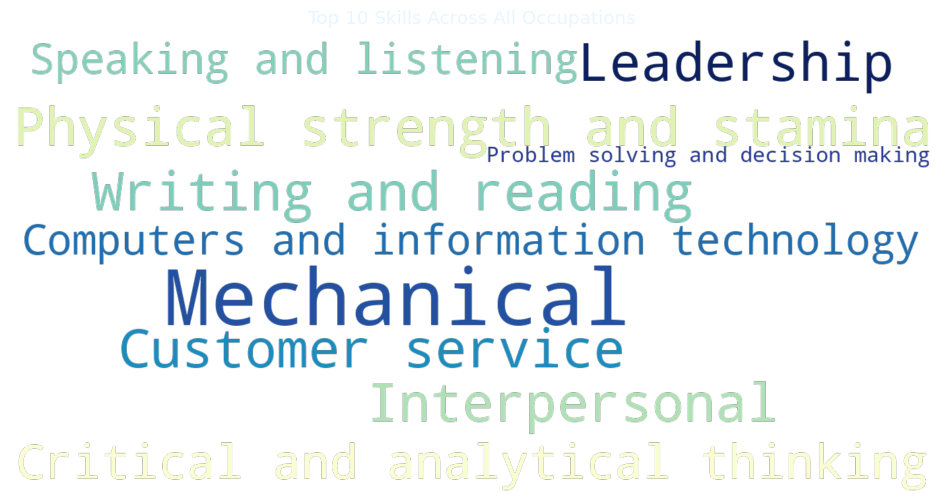

In [ ]:
skill_cols = [
    "Adaptability","Computers and information technology","Creativity and innovation",
    "Critical and analytical thinking","Customer service","Detail oriented","Fine motor",
    "Interpersonal","Leadership","Mathematics","Mechanical","Physical strength and stamina",
    "Problem solving and decision making","Project management","Science",
    "Speaking and listening","Writing and reading"
]

for c in skill_cols:
    if c in future.columns:
        future[c] = pd.to_numeric(future[c], errors="coerce")

skill_means = future[skill_cols].mean().sort_values(ascending=False).head(10)
freq = skill_means.to_dict()

wc = WordCloud(
    width=1400,
    height=700,
    background_color=None if USE_TRANSPARENT else "white",
    mode="RGBA" if USE_TRANSPARENT else "RGB",
    colormap="YlGnBu"   # <-- light gradient palette
).generate_from_frequencies(freq)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Top 10 Skills Across All Occupations", color=font_col)
plt.gca().set_facecolor("none" if USE_TRANSPARENT else "white")
plt.gcf().set_facecolor("none" if USE_TRANSPARENT else "white")
plt.show()


In [ ]:
xls = pd.ExcelFile(excel_path)
print(xls.sheet_names)

edu_sheets = ['No Formal Education', 'High School or equivalent', "Associate's or Trade School", "Bachelor's", 'Graduate']
openings_col = "Occupational openings, projected 2023–33 annual average"
occ_col_guess = "Occupation"

['Future Job Automation', 'Exposure Demographics', 'No Formal Education', 'High School or equivalent', "Associate's or Trade School", "Bachelor's", 'Graduate']


<Figure size 1000x600 with 0 Axes>

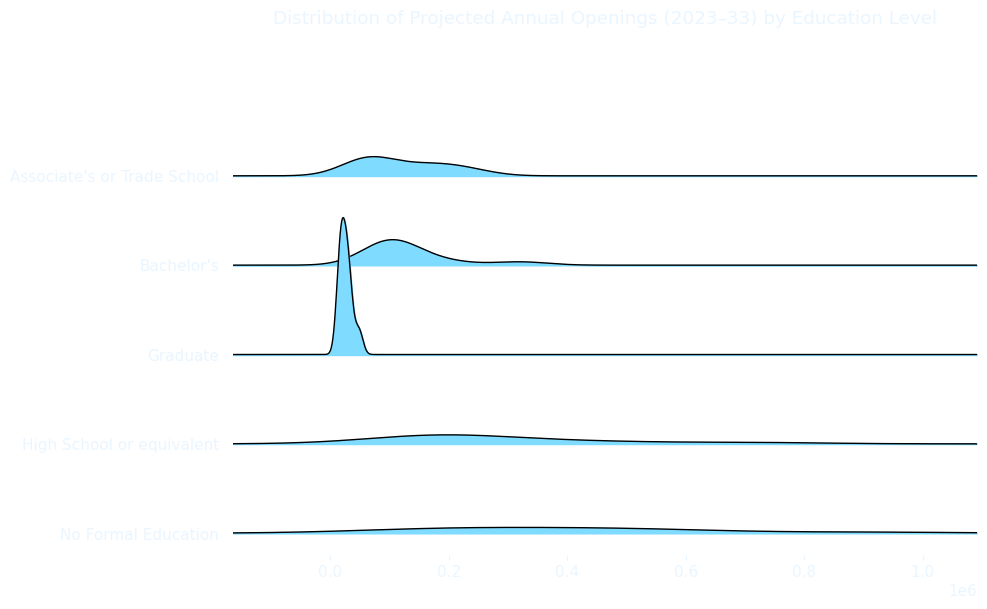

In [ ]:
frames = []
for s in edu_sheets:
    df = pd.read_excel(excel_path, sheet_name=s).copy()
    occ_col = occ_col_guess if occ_col_guess in df.columns else df.columns[0]
    df[openings_col] = pd.to_numeric(df[openings_col], errors="coerce")
    df = df.dropna(subset=[openings_col])
    df["Education_Level"] = s
    frames.append(df[[occ_col, openings_col, "Education_Level"]].rename(columns={occ_col:"Occupation"}))

ed = pd.concat(frames, ignore_index=True)

# Joyplot / ridge plot of openings distribution by education level
plt.figure(figsize=(10,6))
joypy.joyplot(
    ed,
    by="Education_Level",
    column=openings_col,
    figsize=(10,6),
    color=ACCENT,      # single color scheme
    linewidth=1
)
plt.title("Distribution of Projected Annual Openings (2023–33) by Education Level", color=font_col)
plt.gca().set_facecolor("none" if USE_TRANSPARENT else "white")
plt.gcf().set_facecolor("none" if USE_TRANSPARENT else "white")
plt.show()


In [11]:
import pandas as pd
import numpy as np
import plotly.express as px

# Load prior state-level CSV
df = pd.read_csv("ipums_2023_state_maps.csv")
df.head()

# Office/admin: distribution (% of US office/admin workers in each state)
df["office_dist_share"] = pd.to_numeric(df["office_admin_n"], errors="coerce") / total_office

# Add state abbrev for Plotly USA-states mapping
df["STATEFIP"] = df["STATEFIP"].astype(str).str.zfill(2)
fips_to_abbrev = {
    "01":"AL","02":"AK","04":"AZ","05":"AR","06":"CA","08":"CO","09":"CT","10":"DE","11":"DC",
    "12":"FL","13":"GA","15":"HI","16":"ID","17":"IL","18":"IN","19":"IA","20":"KS","21":"KY",
    "22":"LA","23":"ME","24":"MD","25":"MA","26":"MI","27":"MN","28":"MS","29":"MO","30":"MT",
    "31":"NE","32":"NV","33":"NH","34":"NJ","35":"NM","36":"NY","37":"NC","38":"ND","39":"OH",
    "40":"OK","41":"OR","42":"PA","44":"RI","45":"SC","46":"SD","47":"TN","48":"TX","49":"UT",
    "50":"VT","51":"VA","53":"WA","54":"WV","55":"WI","56":"WY"
}
df["state_abbrev"] = df["STATEFIP"].map(fips_to_abbrev)

# Gradient scale versus the box legend for map (blue-green gradient)
def make_map(value_col, title, cbar_title, annotation_text, fmt=".0%"):
    fig = px.choropleth(
        df,
        locations="state_abbrev",
        locationmode="USA-states",
        color=value_col,
        scope="usa",
        color_continuous_scale="PuBuGn",
        labels={value_col: cbar_title},
        title=title,
        hover_name="state_name",
        hover_data={value_col:":.2%","STATEFIP":True},
    )
    fig.update_layout(
        coloraxis_colorbar_tickformat=fmt,
        margin=dict(l=0, r=0, t=60, b=0),
        title=dict(x=0.02, xanchor="left"),
    )
    fig.add_annotation(
        x=0.01, y=0.02,
        xref="paper", yref="paper",
        text=annotation_text,
        showarrow=False,
        align="left",
        font=dict(size=12),
        bgcolor="rgba(255,255,255,0.75)",
        bordercolor="rgba(0,0,0,0.15)",
        borderwidth=1,
        borderpad=6,
    )
    return fig


fig_officeA = make_map(
    "office_dist_share",
    "Office & Administrative Workers per State (2023)",
    "Share of U.S. office/admin workers",
    "What percentage of the nation’s office/admin workforce is in each state?\nThis highlights which states are more vulnerable to automation."
)
fig_officeA.show()